# Ref
https://www.kaggle.com/competitions/playground-series-s4e1/data

# Introduction

The objective is to  predict will a bank customer exit from a bank service.
This is to predict churn rate.

## Target variable

exit




In [1]:
# %%bash
# cd /kaggle/input/
# kaggle competitions download -c playground-series-s4e1
# mkdir playground-series-s4e1
# unzip ./playground-series-s4e1.zip -d ./playground-series-s4e1

# Setup

In [2]:
!pip install -q -r ./requirements.txt

In [3]:
import os
from sklearn.model_selection import train_test_split
import missingno

## Define variables

In [4]:
data_dir = "/kaggle/input/playground-series-s4e1"
is_use_subset = True

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import random
import numpy as np
import seaborn as sns

In [6]:
train = pd.read_csv(data_dir + "/train.csv")

train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
if is_use_subset:
    subset = range(len(train))
    train = train.sample(frac=0.3, random_state=42)
    # train, test = train_test_split(train, test_size=0.2, random_state=42)

train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
33042,33042,15752375,Chukwumaobim,798,France,Female,31.0,8,102075.88,1,1.0,0.0,79577.48,0
36330,36330,15742681,P'eng,629,France,Male,26.0,6,0.00,2,1.0,0.0,38190.78,0
59446,59446,15730397,Pinto,565,France,Male,39.0,7,115163.32,3,1.0,0.0,69052.63,1
92278,92278,15803365,Coffee,653,Spain,Male,55.0,2,70263.83,1,0.0,0.0,62347.71,0
146750,146750,15735270,Horsley,557,France,Female,31.0,6,106596.29,1,1.0,0.0,91305.77,0


In [9]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,49510.000000,4.951000e+04,49510.000000,49510.000000,49510.000000,49510.000000,49510.000000,49510.000000,49510.000000,49510.000000,49510.000000
mean,82740.801818,1.569217e+07,655.486326,38.117289,5.009554,54895.982819,1.555565,0.754494,0.499212,112284.113219,0.209594
std,47490.211471,7.141661e+04,80.192079,8.855213,2.803770,62706.707412,0.546244,0.430391,0.500004,50294.881685,0.407023
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.800000,0.000000
25%,41602.000000,1.563327e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74245.857500,0.000000
50%,82746.000000,1.569016e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.390000,0.000000
75%,123885.750000,1.575690e+07,710.000000,42.000000,7.000000,119545.480000,2.000000,1.000000,1.000000,154775.625000,0.000000
max,165028.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Clean data

## Check duplicated records

In [11]:
train[train.CustomerId.duplicated()].sort_values(by='CustomerId').head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8288,8288,15565706,Akobundu,663,Spain,Male,35.0,4,0.00,1,1.0,1.0,83256.26,1
111963,111963,15565796,P'eng,683,Germany,Male,52.0,2,93768.20,1,0.0,1.0,169669.97,0
12576,12576,15565806,Lockington,773,France,Male,54.0,9,0.00,2,0.0,1.0,24267.88,0
132348,132348,15565878,Bateson,683,Spain,Male,29.0,3,0.00,1,1.0,1.0,197963.46,0
69206,69206,15565878,Bates,631,France,Female,29.0,3,0.00,2,1.0,1.0,197963.46,0
48496,48496,15565878,Ukaegbunam,707,Spain,Female,45.0,2,0.00,2,1.0,0.0,101039.53,0
37134,37134,15565878,Black,631,France,Male,30.0,1,0.00,2,1.0,1.0,197963.46,0
65091,65091,15566139,De Luca,850,France,Male,32.0,6,0.00,2,0.0,1.0,123587.83,0
140494,140494,15566139,Tien,601,Germany,Female,32.0,5,118158.84,1,1.0,0.0,152419.79,0
108217,108217,15566139,Smith,662,France,Male,36.0,8,0.00,2,1.0,0.0,182055.36,0


In [12]:
# Drop unrelated info
col_to_drop = ['Surname', 'id', 'CustomerId']

if set(train.columns).intersection(set(col_to_drop)):  
    train.drop(columns=col_to_drop, inplace=True)
train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
cat_col = train.select_dtypes(include=['object']).columns.to_list()
cat_col

['Geography', 'Gender']

In [14]:
# Rearrange columns to viz correlation

cols = train.columns
train = train[cols[::-1]]
train.columns

Index(['Exited', 'EstimatedSalary', 'IsActiveMember', 'HasCrCard',
       'NumOfProducts', 'Balance', 'Tenure', 'Age', 'Gender', 'Geography',
       'CreditScore'],
      dtype='object')

In [15]:
train.Gender = train.Gender.apply(lambda x: 1 if x == 'Male' else 0)

In [16]:
col_to_drop = ['EstimatedSalary', 'Tenure', 'HasCrCard', 'CreditScore']
if set(train.columns).intersection(set(col_to_drop)):  
    train.drop(columns=col_to_drop, inplace=True)
train = pd.get_dummies(train)

train.head()

,Exited,IsActiveMember,NumOfProducts,Balance,Age,Gender,Geography_France,Geography_Germany,Geography_Spain
33042,0,0.0,1,102075.88,31.0,0,True,False,False
36330,0,0.0,2,0.00,26.0,1,True,False,False
59446,1,0.0,3,115163.32,39.0,1,True,False,False
92278,0,0.0,1,70263.83,55.0,1,False,False,True
146750,0,0.0,1,106596.29,31.0,0,True,False,False


In [17]:
corr = train.corr()

# corr = corr.mask(np.triu(np.ones_like(corr, bool)))
# corr.replace(np.nan, '', inplace=True)
# corr

In [18]:
corr.index

Index(['Exited', 'IsActiveMember', 'NumOfProducts', 'Balance', 'Age', 'Gender',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [19]:
corr = corr.sort_values(by='Exited', ascending=False)
corr

,Exited,IsActiveMember,NumOfProducts,Balance,Age,Gender,Geography_France,Geography_Germany,Geography_Spain
Exited,1.000000,-0.208752,-0.215588,0.130408,0.336598,-0.148347,-0.133435,0.211357,-0.047519
Age,0.336598,0.003504,-0.107011,0.065465,1.000000,-0.056318,-0.058647,0.091495,-0.019517
Geography_Germany,0.211357,-0.038612,-0.100590,0.540822,0.091495,-0.038034,-0.590812,1.000000,-0.273135
Balance,0.130408,-0.015146,-0.363033,1.000000,0.065465,-0.012995,-0.330048,0.540822,-0.135169
Geography_Spain,-0.047519,0.010619,0.028296,-0.135169,-0.019517,0.012775,-0.614760,-0.273135,1.000000
Geography_France,-0.133435,0.022751,0.058741,-0.330048,-0.058647,0.020469,1.000000,-0.590812,-0.614760
Gender,-0.148347,0.036028,0.025412,-0.012995,-0.056318,1.000000,0.020469,-0.038034,0.012775
IsActiveMember,-0.208752,1.000000,0.041389,-0.015146,0.003504,0.036028,0.022751,-0.038612,0.010619
NumOfProducts,-0.215588,0.041389,1.000000,-0.363033,-0.107011,0.025412,0.058741,-0.100590,0.028296


In [20]:
train= train[corr.index.to_list()] 
train

,Exited,Age,Geography_Germany,Balance,Geography_Spain,Geography_France,Gender,IsActiveMember,NumOfProducts
33042,0,31.0,False,102075.88,False,True,0,0.0,1
36330,0,26.0,False,0.00,False,True,1,0.0,2
59446,1,39.0,False,115163.32,False,True,1,0.0,3
92278,0,55.0,False,70263.83,True,False,1,0.0,1
146750,0,31.0,False,106596.29,False,True,0,0.0,1
...,...,...,...,...,...,...,...,...,...
153714,0,33.0,False,0.00,False,True,1,1.0,2
50284,1,35.0,True,139756.12,False,False,1,0.0,1
63240,0,38.0,True,93978.96,False,False,1,0.0,2
122855,1,26.0,False,0.00,False,True,0,0.0,1


In [21]:
corr = train.corr()
corr = corr.mask(np.triu(np.ones_like(corr, bool)))
# corr =corr.replace(np.nan, '')
corr.style.background_gradient(cmap='coolwarm')
# corr.replace(np.nan, '')

/home/vin/miniconda3/envs/py312kaggle/lib/python3.12/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/vin/miniconda3/envs/py312kaggle/lib/python3.12/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Exited,Age,Geography_Germany,Balance,Geography_Spain,Geography_France,Gender,IsActiveMember,NumOfProducts
Exited,nan,nan,nan,nan,nan,nan,nan,nan,nan
Age,0.336598,nan,nan,nan,nan,nan,nan,nan,nan
Geography_Germany,0.211357,0.091495,nan,nan,nan,nan,nan,nan,nan
Balance,0.130408,0.065465,0.540822,nan,nan,nan,nan,nan,nan
Geography_Spain,-0.047519,-0.019517,-0.273135,-0.135169,nan,nan,nan,nan,nan
Geography_France,-0.133435,-0.058647,-0.590812,-0.330048,-0.614760,nan,nan,nan,nan
Gender,-0.148347,-0.056318,-0.038034,-0.012995,0.012775,0.020469,nan,nan,nan
IsActiveMember,-0.208752,0.003504,-0.038612,-0.015146,0.010619,0.022751,0.036028,nan,nan
NumOfProducts,-0.215588,-0.107011,-0.100590,-0.363033,0.028296,0.058741,0.025412,0.041389,nan


## Country-wise exit pattern seems different


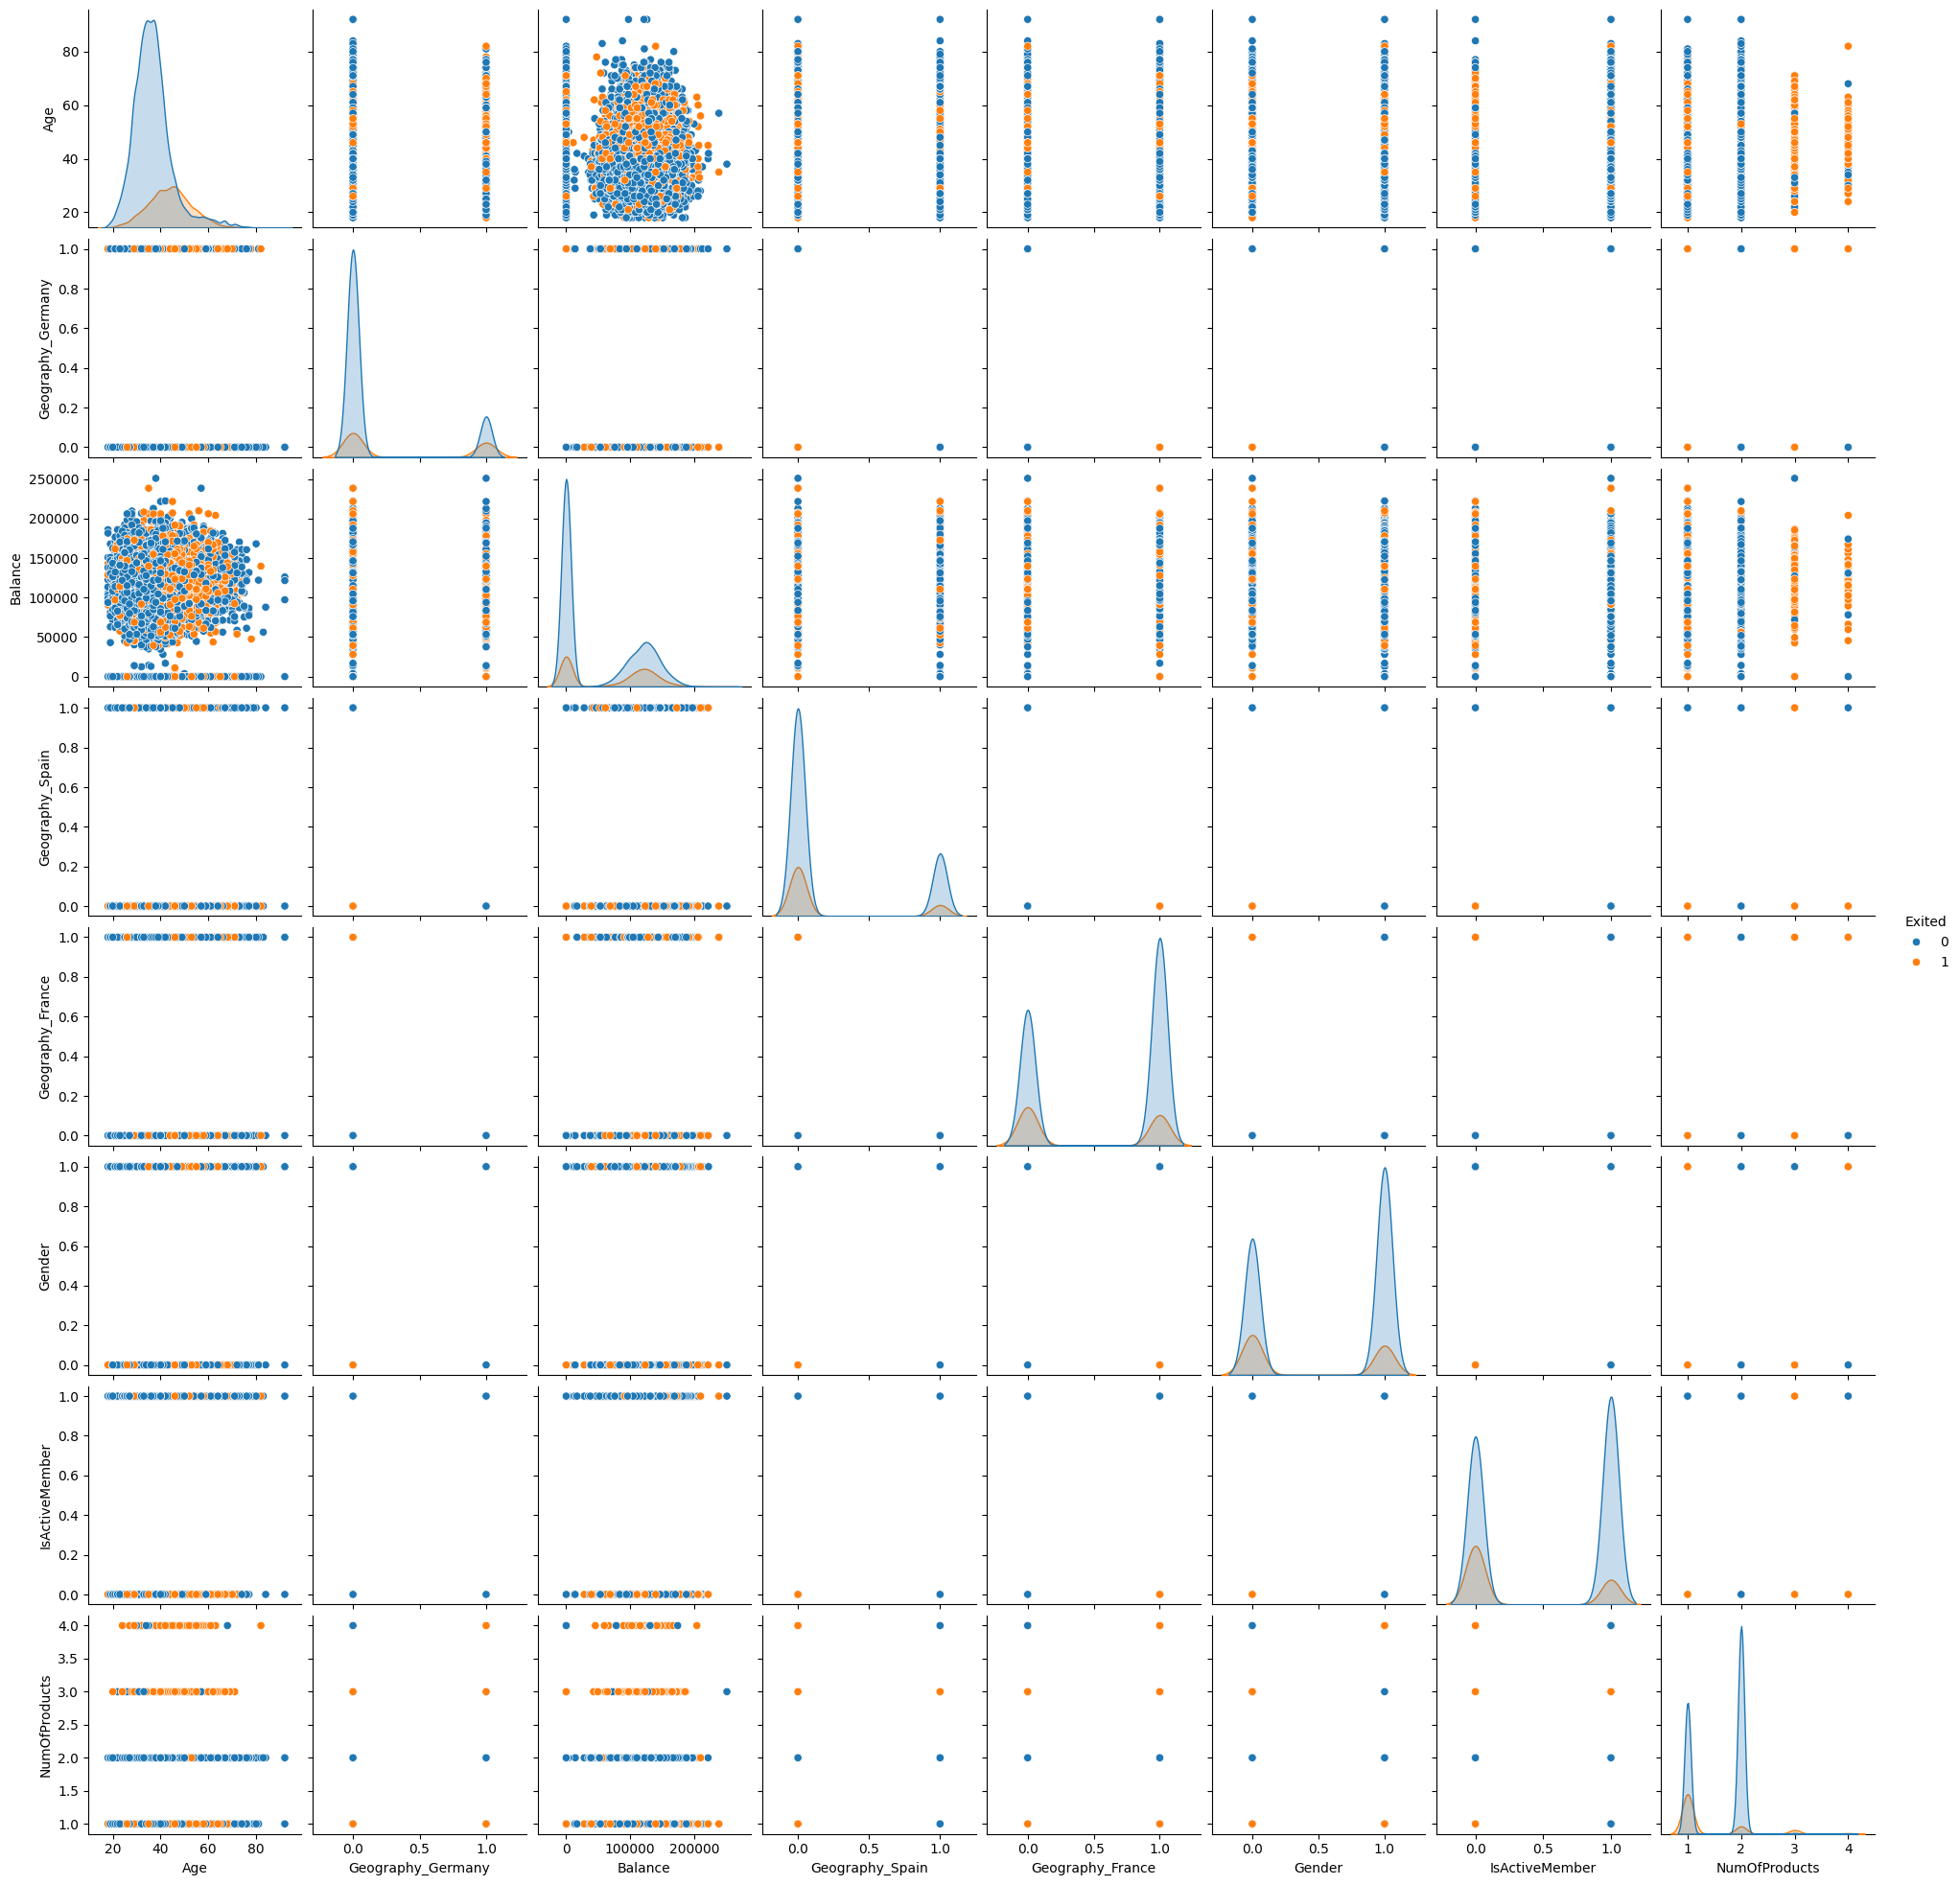

In [22]:
img = sns.pairplot(train,hue='Exited')

## Check missing values

In [52]:
import missingno
if train.isna().sum(axis='columns').sum():
    print("There are missing values in the training set")
    missingno.matrix(train[train.isna().sum() == 1])

# EDA

In [23]:
!nvidia-smi

Tue Oct  1 22:12:07 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:65:00.0 Off |                  N/A |
| 30%   34C    P8    21W / 250W |     15MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49510 entries, 33042 to 143975
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Exited             49510 non-null  int64  
 1   Age                49510 non-null  float64
 2   Geography_Germany  49510 non-null  bool   
 3   Balance            49510 non-null  float64
 4   EstimatedSalary    49510 non-null  float64
 5   Tenure             49510 non-null  int64  
 6   HasCrCard          49510 non-null  float64
 7   CreditScore        49510 non-null  int64  
 8   Geography_Spain    49510 non-null  bool   
 9   Geography_France   49510 non-null  bool   
 10  Gender             49510 non-null  int64  
 11  IsActiveMember     49510 non-null  float64
 12  NumOfProducts      49510 non-null  int64  
dtypes: bool(3), float64(5), int64(5)
memory usage: 4.3 MB


# Model 

In [54]:
from sklearn.model_selection import train_test_split
